## About Dataset
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.


In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Datasets
customers = pd.read_csv(r"E:\Olist_Dataset\olist_customers_dataset.csv")
geolocation = pd.read_csv(r"E:\Olist_Dataset\olist_geolocation_dataset.csv")
order_items = pd.read_csv(r"E:\Olist_Dataset\olist_order_items_dataset.csv")
order_payment = pd.read_csv(r"E:\Olist_Dataset\olist_order_payments_dataset.csv")
order_review = pd.read_csv(r"E:\Olist_Dataset\olist_order_reviews_dataset.csv")
sellers = pd.read_csv(r"E:\Olist_Dataset\olist_sellers_dataset.csv")
orders = pd.read_csv(r"E:\Olist_Dataset\olist_orders_dataset.csv")
products = pd.read_csv(r"E:\Olist_Dataset\olist_products_dataset.csv")
product_category_name_translation = pd.read_csv(r"E:\Olist_Dataset\product_category_name_translation.csv")

## Time to analysis each of datasets.

In [3]:
#Starting with customers dataset.
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#Number of data point
customers.shape

(99441, 5)

Customers dataset has 99441 columns and 5 rows.

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.duplicated().sum()

0

There is no null value present in this dataset and all value are unique


Now we gonna find out customers per state

In [7]:
customers_per_state =customers.groupby("customer_state").count().reset_index()
customers_per_state

,customer_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city
0,AC,81,81,81,81
1,AL,413,413,413,413
2,AM,148,148,148,148
3,AP,68,68,68,68
4,BA,3380,3380,3380,3380
5,CE,1336,1336,1336,1336
6,DF,2140,2140,2140,2140
7,ES,2033,2033,2033,2033
8,GO,2020,2020,2020,2020
9,MA,747,747,747,747


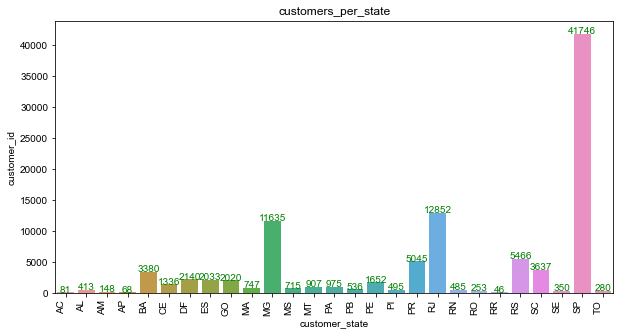

In [8]:
#Plotting barplot
plt.figure(figsize=(10,5))
s = sns.barplot(x = 'customer_state', y = 'customer_id', data = customers_per_state)

plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('customers_per_state')
for index, row in customers_per_state.iterrows():
    s.text(row.name,row.customer_id, round(row.customer_id,2), color='green', ha="center")
plt.show()

### Orders Dataset

In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


As we can see order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date all are object datatype so we need to change datatype object to timestamp.

In [11]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [13]:
#Checking null values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Indeed, there are null values in several of the columns (order approved, delivery date to delivery person, delivery date to customer). However, these do not seem to be errors, but correspond to the casuistry of the business operations.
Let's check that the order statuses are correct according to the delivery dates to the delivery person and to the customer.

In [14]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Let's start with the orders that have the order_approved_at field empty. All those orders should be in 'created', 'canceled', or 'unavailable' status. Let's check:

In [15]:
orders[orders['order_approved_at'].isnull()]['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

14 orders that have been delivered (order_status = 'delivered') but have no approval date. This seems to be an error that have to be fix.

To fix it, for the moment,I can replace the approval date by the order date, as if there was an automatic approval.

In [16]:
#lets look 14 orders
order14 = ((orders['order_approved_at'].isna()) & (orders['order_status']=='delivered'))
orders[order14]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [17]:
# modify the value of the field 'order_approved_at' of the records with this filter to the value of the field 'order_purchase_timestamp'.
orders.loc[order14, 'order_approved_at'] = orders.loc[order14, 'order_purchase_timestamp']

In [18]:
#Now we have to cross check null values.
orders[orders['order_approved_at'].isnull()]['order_status'].value_counts()

canceled    141
created       5
Name: order_status, dtype: int64

Lets continue with different fields.

In [19]:
orders[orders['order_delivered_carrier_date'].isna()]['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

There are 2 orders in delivered status but without a delivery date. Assuming the same as before, we'll fix them by assigning them the order approval date. Let's look at the two orders

In [20]:
order2 = ((orders['order_delivered_carrier_date'].isna()) & (orders['order_status']=='delivered'))
orders[order2]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [21]:
# modify the value of the field 'order_approved_at' of the records with this filter to the value of the field 'order_approved_at'.
orders.loc[order2, 'order_delivered_carrier_date'] = orders.loc[order2, 'order_approved_at']

In [22]:
orders[orders['order_delivered_carrier_date'].isna()]['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: order_status, dtype: int64

Now let's take a look at the order_delivered_customer_date field

In [23]:
orders[orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

There are 8 orders that have an empty customer delivery date but are in 'delivered' status. Let's look at those 8 orders.

In [24]:
order8 = ((orders['order_delivered_customer_date'].isna()) & (orders['order_status']=='delivered'))
orders[order8]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:30:16,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [25]:
#Modifying 'order_delivered_customer_date' to 'order_estimated_delivery_date' for 8 NaT orders
orders.loc[order8,'order_delivered_customer_date'] = orders.loc[order8,'order_estimated_delivery_date']

In [26]:
orders[orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

Let's see some visualizations about the orders data, which will give us information about the orders. Analyzing the orders dataset we can see some interesting data (distributions by dates, times...). For quick visualizations we can use plotly express which allows us to create interactive charts.

In [27]:
#Let creates fields to date and time management (based on purchase time)
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['weekday'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['day_name'] = orders['order_purchase_timestamp'].dt.day_name()
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['weeknum'] = orders['order_purchase_timestamp'].dt.isocalendar().week
orders['month_year'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.to_period('M').astype(str)
orders['date'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.to_period('D').astype(str)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day,weekday,day_name,hour,weeknum,month_year,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2,0,Monday,10,40,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,24,1,Tuesday,20,30,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,8,2,Wednesday,8,32,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,18,5,Saturday,19,46,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,13,1,Tuesday,21,7,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,9,3,Thursday,9,10,2017-03,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,6,1,Tuesday,12,6,2018-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,27,6,Sunday,14,34,2017-08,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,8,0,Monday,21,2,2018-01,2018-01-08


In [28]:
#grouping the dataset by the year field
total_order_each_year = orders.groupby("year").count().reset_index()

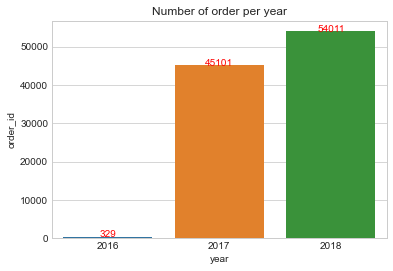

In [29]:
# Now ploting bar chart 
g = sns.barplot(x = 'year', y = 'order_id', data=total_order_each_year)
plt.style.use('seaborn-whitegrid')
plt.title('Number of order per year')
for index, row in total_order_each_year.iterrows():
    g.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

We see that 2016 has hardly any orders, 2017 does seem to be whole, and 2018 we don't know if it is whole or not. We will see in the following graphs.

Now we gonna plot only year of 2018 for order id with months

In [30]:
order_in_2018 = orders.loc[orders['year'].isin([2018])]

In [31]:
order_in_2018_per_month = order_in_2018.groupby("month").count().reset_index()
order_in_2018_per_month

,month,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,day,weekday,day_name,hour,weeknum,month_year,date
0,1,7269,7269,7269,7269,7268,7169,7069,7269,7269,7269,7269,7269,7269,7269,7269,7269
1,2,6728,6728,6728,6728,6724,6653,6556,6728,6728,6728,6728,6728,6728,6728,6728,6728
2,3,7211,7211,7211,7211,7208,7138,7003,7211,7211,7211,7211,7211,7211,7211,7211,7211
3,4,6939,6939,6939,6939,6939,6897,6798,6939,6939,6939,6939,6939,6939,6939,6939,6939
4,5,6873,6873,6873,6873,6872,6803,6749,6873,6873,6873,6873,6873,6873,6873,6873,6873
5,6,6167,6167,6167,6167,6167,6142,6099,6167,6167,6167,6167,6167,6167,6167,6167,6167
6,7,6292,6292,6292,6292,6291,6219,6159,6292,6292,6292,6292,6292,6292,6292,6292,6292
7,8,6512,6512,6512,6512,6459,6398,6351,6512,6512,6512,6512,6512,6512,6512,6512,6512
8,9,16,16,16,16,1,1,0,16,16,16,16,16,16,16,16,16
9,10,4,4,4,4,0,0,0,4,4,4,4,4,4,4,4,4


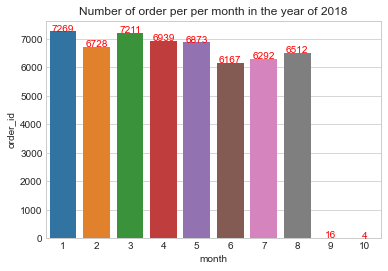

In [32]:
# Now ploting bar chart 
s = sns.barplot(x = 'month', y = 'order_id', data=order_in_2018_per_month)
plt.style.use('seaborn-whitegrid')
plt.title('Number of order per per month in the year of 2018')
for index, row in order_in_2018_per_month.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

We can see in 2018, we dont have data of all 12 months.

Now we gonna plot only year of 2017 for order id with months and want to check by which months growth started

In [33]:
order_in_2017 = orders.loc[orders['year'].isin([2017])]
order_in_2017_per_month = order_in_2017.groupby("month").count().reset_index()
order_in_2017_per_month

,month,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,day,weekday,day_name,hour,weeknum,month_year,date
0,1,800,800,800,800,799,766,750,800,800,800,800,800,800,800,800,800
1,2,1780,1780,1780,1780,1778,1674,1653,1780,1780,1780,1780,1780,1780,1780,1780,1780
2,3,2682,2682,2682,2682,2680,2591,2546,2682,2682,2682,2682,2682,2682,2682,2682,2682
3,4,2404,2404,2404,2404,2400,2352,2303,2404,2404,2404,2404,2404,2404,2404,2404,2404
4,5,3700,3700,3700,3700,3691,3601,3546,3700,3700,3700,3700,3700,3700,3700,3700,3700
5,6,3245,3245,3245,3245,3241,3182,3135,3245,3245,3245,3245,3245,3245,3245,3245,3245
6,7,4026,4026,4026,4026,4021,3928,3872,4026,4026,4026,4026,4026,4026,4026,4026,4026
7,8,4331,4331,4331,4331,4325,4234,4193,4331,4331,4331,4331,4331,4331,4331,4331,4331
8,9,4285,4285,4285,4285,4281,4188,4150,4285,4285,4285,4285,4285,4285,4285,4285,4285
9,10,4631,4631,4631,4631,4626,4511,4478,4631,4631,4631,4631,4631,4631,4631,4631,4631


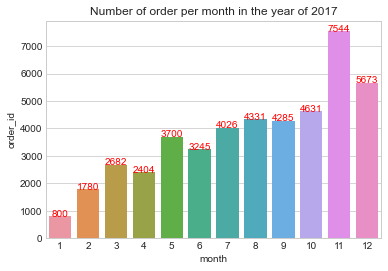

In [34]:
# Now ploting bar chart 
s = sns.barplot(x = 'month', y = 'order_id', data=order_in_2017_per_month)
plt.style.use('seaborn-whitegrid')
plt.title('Number of order per month in the year of 2017')
for index, row in order_in_2017_per_month.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

We can see growth since November 2017 and that 2018 is not yet complete.

Now we will check order per day if we found any interesting thing.

In [35]:
order_per_day = orders.groupby("date").count().reset_index()
order_per_day

,date,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day,weekday,day_name,hour,weeknum,month_year
0,2016-09-04,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
1,2016-09-05,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
2,2016-09-13,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
3,2016-09-15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2016-10-02,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,2018-09-29,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
630,2018-10-01,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
631,2018-10-03,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
632,2018-10-16,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1


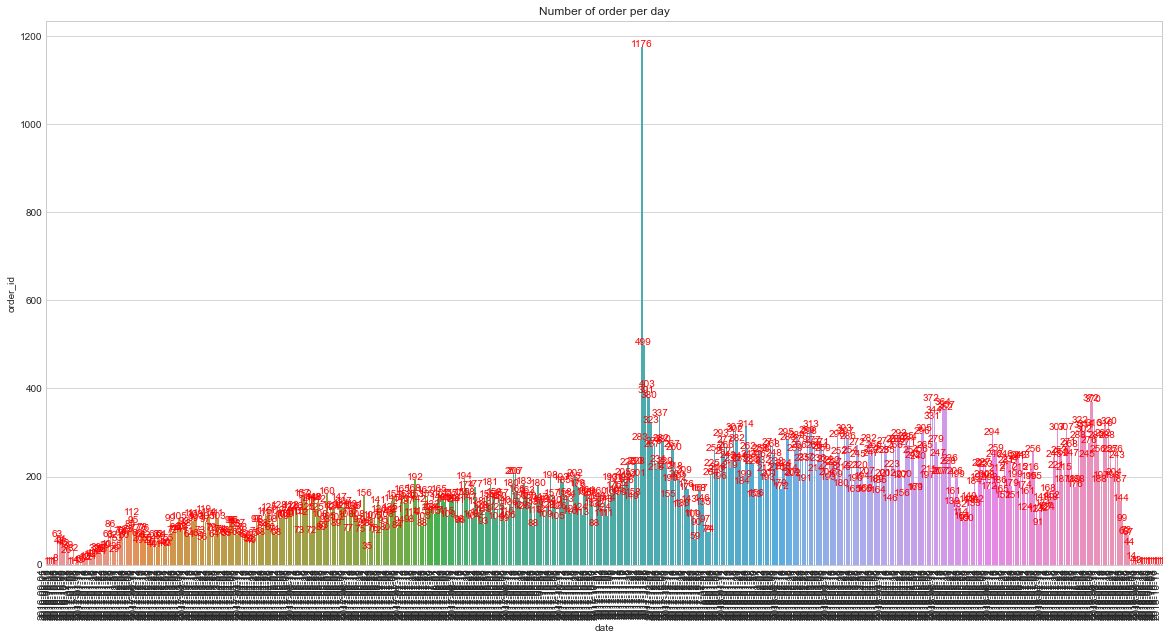

In [36]:
#Plotting Bar plot
plt.figure(figsize=(20,10))
s = sns.barplot(x = 'date', y = 'order_id', data=order_per_day)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Number of order per day')
for index, row in order_per_day.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

At first glance we see a very exaggerated peak around 11/24/2017, which corresponds to that year's Black Friday.

Let's look at the distribution by day of the week. If we use the weekday field it shows us the number of day of the week.

In [37]:
order_on_weekday = orders.groupby("day_name").count().reset_index()
order_on_weekday

,day_name,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day,weekday,hour,weeknum,month_year,date
0,Friday,14122,14122,14122,14122,14102,13863,13686,14122,14122,14122,14122,14122,14122,14122,14122,14122
1,Monday,16196,16196,16196,16196,16175,15884,15703,16196,16196,16196,16196,16196,16196,16196,16196,16196
2,Saturday,10887,10887,10887,10887,10875,10701,10556,10887,10887,10887,10887,10887,10887,10887,10887,10887
3,Sunday,11960,11960,11960,11960,11949,11773,11637,11960,11960,11960,11960,11960,11960,11960,11960,11960
4,Thursday,14761,14761,14761,14761,14730,14489,14323,14761,14761,14761,14761,14761,14761,14761,14761,14761
5,Tuesday,15963,15963,15963,15963,15934,15661,15503,15963,15963,15963,15963,15963,15963,15963,15963,15963
6,Wednesday,15552,15552,15552,15552,15530,15289,15076,15552,15552,15552,15552,15552,15552,15552,15552,15552


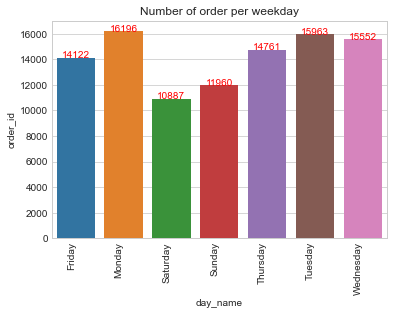

In [38]:
#Plotting Bar plot
#plt.figure(figsize=(10,10))
s = sns.barplot(x = 'day_name', y = 'order_id', data=order_on_weekday)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Number of order per weekday')
for index, row in order_on_weekday.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

Purchases are higher from Monday to Friday. We can go down one more novel and see the distribution by time slots

In [39]:
order_per_hour = orders.groupby("hour").count().reset_index()
order_per_hour

,hour,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day,weekday,day_name,weeknum,month_year,date
0,0,2394,2394,2394,2394,2393,2351,2322,2394,2394,2394,2394,2394,2394,2394,2394,2394
1,1,1170,1170,1170,1170,1164,1145,1133,1170,1170,1170,1170,1170,1170,1170,1170,1170
2,2,510,510,510,510,510,500,496,510,510,510,510,510,510,510,510,510
3,3,272,272,272,272,272,265,259,272,272,272,272,272,272,272,272,272
4,4,206,206,206,206,206,204,203,206,206,206,206,206,206,206,206,206
5,5,188,188,188,188,188,183,182,188,188,188,188,188,188,188,188,188
6,6,502,502,502,502,502,490,478,502,502,502,502,502,502,502,502,502
7,7,1231,1231,1231,1231,1230,1214,1199,1231,1231,1231,1231,1231,1231,1231,1231,1231
8,8,2967,2967,2967,2967,2959,2926,2907,2967,2967,2967,2967,2967,2967,2967,2967,2967
9,9,4785,4785,4785,4785,4775,4693,4647,4785,4785,4785,4785,4785,4785,4785,4785,4785


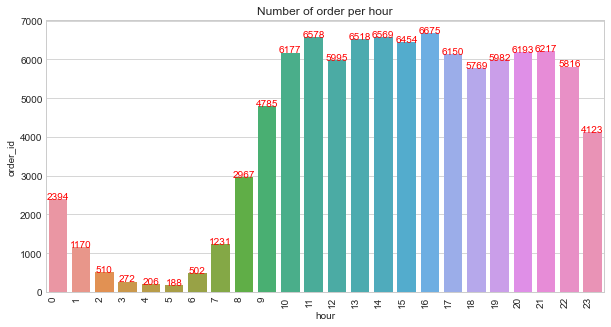

In [40]:
plt.figure(figsize=(10,5))
s = sns.barplot(x = 'hour', y = 'order_id', data=order_per_hour)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Number of order per hour')
for index, row in order_per_hour.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

we can see that user mainly start ordering from 8 AM.

### Order Items Dataset

Order_items is the dataset containing all the items that go on each order

In [41]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [42]:
order_items.shape

(112650, 7)

In [43]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [44]:
order_items.duplicated().sum()

0

Here is not any duplicate value or null value we can marge orders with order_items

In [45]:
orders = orders.merge(order_items, on='order_id', how="left")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,hour,weeknum,month_year,date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,10,40,2017-10,2017-10-02,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,20,30,2018-07,2018-07-24,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,8,32,2018-08,2018-08-08,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,19,46,2017-11,2017-11-18,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,21,7,2018-02,2018-02-13,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,...,12,6,2018-02,2018-02-06,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,...,14,34,2017-08,2017-08-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,...,21,2,2018-01,2018-01-08,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,...,21,2,2018-01,2018-01-08,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


Lets groupby with 'order_item_id' and will look order items per order  

In [46]:
orders_per_items = orders.groupby("order_item_id").count().reset_index()
orders_per_items

,order_item_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,...,day_name,hour,weeknum,month_year,date,product_id,seller_id,shipping_limit_date,price,freight_value
0,1.0,98666,98666,98666,98666,98666,97659,96484,98666,98666,...,98666,98666,98666,98666,98666,98666,98666,98666,98666,98666
1,2.0,9803,9803,9803,9803,9803,9698,9636,9803,9803,...,9803,9803,9803,9803,9803,9803,9803,9803,9803,9803
2,3.0,2287,2287,2287,2287,2287,2253,2243,2287,2287,...,2287,2287,2287,2287,2287,2287,2287,2287,2287,2287
3,4.0,965,965,965,965,965,940,937,965,965,...,965,965,965,965,965,965,965,965,965,965
4,5.0,460,460,460,460,460,444,442,460,460,...,460,460,460,460,460,460,460,460,460,460
5,6.0,256,256,256,256,256,251,249,256,256,...,256,256,256,256,256,256,256,256,256,256
6,7.0,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
7,8.0,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
8,9.0,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
9,10.0,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


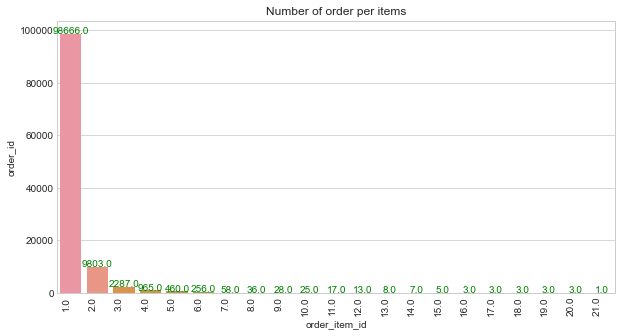

In [47]:
#ploting bar plot
plt.figure(figsize=(10,5))
s = sns.barplot(x = 'order_item_id', y = 'order_id', data=orders_per_items)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Number of order per items')
for index, row in orders_per_items.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='green', ha="center")
plt.show()

We can see user usually order one item for each order. 

In [48]:
#Finding null values 
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1966
order_delivered_customer_date    3221
order_estimated_delivery_date       0
year                                0
month                               0
day                                 0
weekday                             0
day_name                            0
hour                                0
weeknum                             0
month_year                          0
date                                0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

There are 775 order_item_id has null value. we have deep dive into it to find any error.

In [49]:
order_item_id775 = (orders['order_item_id'].isnull())
orders[order_item_id775].groupby('order_status')['order_id'].count()

order_status
canceled       164
created          5
invoiced         2
shipped          1
unavailable    603
Name: order_id, dtype: int64

Every looks okay excepts one shipped items. 

In [50]:
shipped1 = ((orders['order_item_id'].isna()) & (orders['order_status']=='shipped'))
orders[shipped1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,hour,weeknum,month_year,date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
26478,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01,2016,10,...,1,40,2016-10,2016-10-05,NaN,NaN,NaN,NaN,NaN,NaN


For this single order, we have decided to eliminate it, in case further analysis could cause a problem.

In [51]:
orders = orders.drop(orders[shipped1].index)

In [52]:
orders[order_item_id775].groupby('order_status')['order_id'].count()

<ipython-input-52-8bb28eb49239>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders[order_item_id775].groupby('order_status')['order_id'].count()


order_status
canceled       164
created          5
invoiced         2
unavailable    603
Name: order_id, dtype: int64

Now we will check distribution of price so that we can understand audience

In [53]:
orders_price_per_items = orders.groupby("price").count().reset_index()
orders_price_per_items

,price,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,...,day_name,hour,weeknum,month_year,date,order_item_id,product_id,seller_id,shipping_limit_date,freight_value
0,0.85,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1.20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2,2.20,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2.29,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2.90,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963,4690.00,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5964,4799.00,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5965,6499.00,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5966,6729.00,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


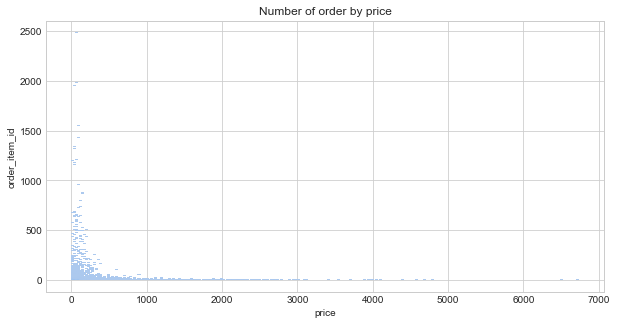

In [54]:
#plotting histogram
plt.figure(figsize=(10,5))
h = sns.histplot(x = 'price', y = 'order_item_id', data = orders_price_per_items)

plt.style.use('seaborn-whitegrid')

plt.title('Number of order by price')
#for index, row in orders_price_per_items.iterrows():
    #h.text(row.name,row.order_id, round(row.order_id,2), color='green', ha="center")
plt.show()

By visual we can tell order_item_id vs price follows pareto distributions

### Order Payment Dataset

In [55]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Not a single null value present in dataset

In [57]:
order_payment.duplicated().sum()

0

In [58]:
payment_types = order_payment.groupby('payment_type').count().reset_index()
payment_types

,payment_type,order_id,payment_sequential,payment_installments,payment_value
0,boleto,19784,19784,19784,19784
1,credit_card,76795,76795,76795,76795
2,debit_card,1529,1529,1529,1529
3,not_defined,3,3,3,3
4,voucher,5775,5775,5775,5775


In [59]:
not_defined_3 = order_payment["payment_type"]== 'not_defined'
order_payment[not_defined_3]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [60]:
#As those payments value zero and payment_type not_defined we can drop them
order_payment = order_payment.drop(order_payment[not_defined_3].index)

In [61]:
payment_types = order_payment.groupby('payment_type').count().reset_index()
payment_types

,payment_type,order_id,payment_sequential,payment_installments,payment_value
0,boleto,19784,19784,19784,19784
1,credit_card,76795,76795,76795,76795
2,debit_card,1529,1529,1529,1529
3,voucher,5775,5775,5775,5775


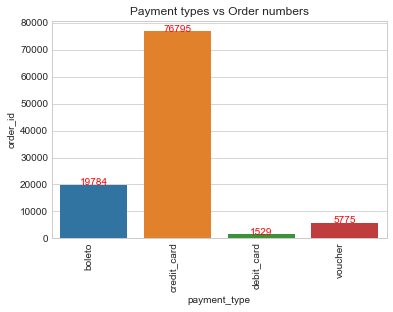

In [62]:
#plotting barplot
s = sns.barplot(x = 'payment_type', y = 'order_id', data=payment_types)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Payment types vs Order numbers')
for index, row in payment_types.iterrows():
    s.text(row.name,row.order_id, round(row.order_id,2), color='red', ha="center")
plt.show()

Around 73% transition made by credit card

### Seller Dataset

In [63]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [65]:
sellers_per_state = sellers.groupby('seller_state').count().reset_index()
sellers_per_state

,seller_state,seller_id,seller_zip_code_prefix,seller_city
0,AC,1,1,1
1,AM,1,1,1
2,BA,19,19,19
3,CE,13,13,13
4,DF,30,30,30
5,ES,23,23,23
6,GO,40,40,40
7,MA,1,1,1
8,MG,244,244,244
9,MS,5,5,5


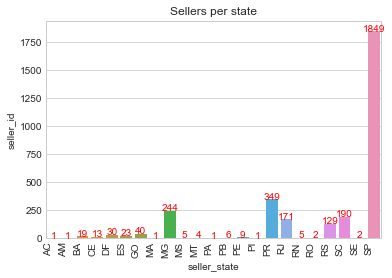

In [66]:
#Plotting barplot 
s = sns.barplot(x = 'seller_state', y = 'seller_id', data=sellers_per_state)
plt.style.use('seaborn-whitegrid')
s.set_xticklabels(s.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.title('Sellers per state')
for index, row in sellers_per_state.iterrows():
    s.text(row.name,row.seller_id, round(row.seller_id,2), color='red', ha="center")
plt.show()

 São Paulo State has major number of seller as well as customer

### Products Dataset

In [67]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [68]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [69]:
products.duplicated().sum()

0

Product dataset does not have any null value or duplicate value we can skip data cleaning part here.

In this notebook we all go through EDA part known some valueable point that will help us understanding about dataset.